## **Support Vector Machines**

- Support Vector Machines (SVMs) are a powerful supervised learning algorithm used primarily for classification tasks, though they can also be used for regression. SVMs work by finding the optimal hyperplane that best separates classes in the feature space, maximizing the margin between different class boundaries. 

In [1]:
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**Data**

In [2]:
# Path 
file_path = 'data.csv'

# read the data
data = pd.read_csv(file_path)
if 'Unnamed: 0' in data.columns: 
    data.drop('Unnamed: 0', axis=1, inplace=True)

**Model**

In [3]:
# Separate the features and the target variable
X = data.iloc[:, :-1]  # last column is the target
y = data.iloc[:, -1]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# shape 
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (39617, 9)
X_test shape: (9905, 9)
y_train shape: (39617,)
y_test shape: (9905,)


In [11]:
# model 
# Initialize the SVM classifier
svc = SVC(C=1, kernel='poly', gamma='auto')
svc

SVC(C=1, gamma='auto', kernel='poly')

In [13]:
# Training job
svc.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [14]:
# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

# Detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on Test Set: 84.34%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      2042
         1.0       0.68      0.93      0.78      1547
         2.0       0.98      0.98      0.98      1010
         3.0       0.46      0.26      0.33       376
         4.0       0.53      0.22      0.31       421
         5.0       0.89      0.89      0.89       303
         6.0       0.92      0.93      0.93       563
         7.0       0.76      0.68      0.72       402
         8.0       0.60      0.66      0.62       780
         9.0       0.78      0.62      0.69       263
        10.0       0.92      0.59      0.72       368
        11.0       0.99      0.99      0.99      1830

    accuracy                           0.84      9905
   macro avg       0.79      0.73      0.74      9905
weighted avg       0.84      0.84      0.83      9905

Confusion Matrix:
 [[1965   16   18    2    1    5    6    2   10    1    3   13

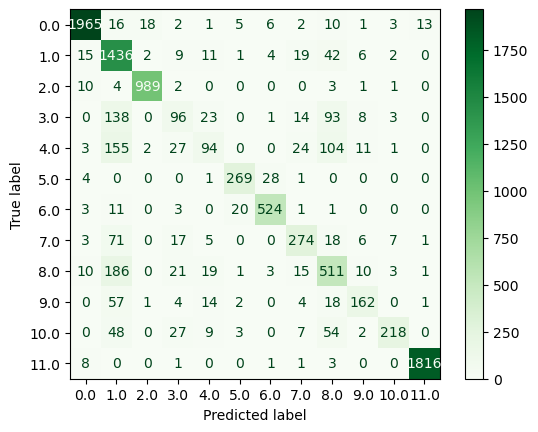

In [16]:
# display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Greens)

**Save the model**

In [17]:
# Save the model 
import joblib
import os

# Replace with the path to your desired folder
folder_path = "saved_models"
model_filename = "svm_model.pkl"
full_path = os.path.join(folder_path, model_filename)

# Ensure the directory exists
os.makedirs(folder_path, exist_ok=True)

# Save the trained SVM model
joblib.dump(svc, full_path)

print(f"Model saved at {full_path}")

Model saved at saved_models\svm_model.pkl
